In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from numpy.random import seed
seed(1)

In [ ]:
#To upload CSV file from device
from google.colab import files
data_to_load = files.upload()

Saving FinalProject to FinalProject


In [ ]:
dataset = pd.read_csv('FinalProject',index_col='month')
dataset.head()

,energy_used,mean_temp,max_temp,min_temp,vapor_pressure,rain_days,cloud_cover,population,electricity_price,cpi
month,,,,,,,,,,
1973-01-01,1957.641,17.0,0.9,-10.1,4.0,14.3,66.2,211053,2.9,36.5
1973-02-01,1712.143,20.0,4.0,-7.8,4.4,15.8,64.5,211187,2.9,36.7
1973-03-01,1510.079,23.2,9.0,-2.3,6.4,16.1,68.5,211337,2.8,36.9
1973-04-01,1183.421,28.5,13.1,0.8,7.1,11.2,65.1,211499,2.9,37.1
1973-05-01,1006.326,30.0,19.8,6.3,9.5,8.1,60.9,211662,2.8,37.1


In [ ]:
dataset.drop(['mean_temp', 'max_temp','min_temp','vapor_pressure','rain_days','cloud_cover','population','electricity_price', 'cpi'],axis=1,inplace=True)

In [ ]:
dataset.isnull().sum()
dataset.shape

(504, 1)

In [ ]:
dataset.columns = ['Energy_Consumed']

In [ ]:
dataset.head()

,Energy_Consumed
month,
1973-01-01,1957.641
1973-02-01,1712.143
1973-03-01,1510.079
1973-04-01,1183.421
1973-05-01,1006.326


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.9MB/s 
     |████████████████████████████████| 9.5MB 46.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_model = auto_arima(dataset, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6114.084, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6010.871, Time=0.43 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5861.025, Time=1.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6062.182, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5861.955, Time=1.63 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5861.390, Time=4.77 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5984.347, Time=0.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5858.229, Time=11.85 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=12.96 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=5851.805, Time=4.19 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5908.179, Time=1.42 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=5893.633, Time=2.95 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=5.36 sec
 ARIMA(0,1,2)(2,1,1)[12]        

In [ ]:
stepwise_model.aic()

5765.787132249062

In [ ]:
train = dataset.iloc[0:387]

In [ ]:
train.tail()

,Energy_Consumed
month,
2004-11-01,1574.654
2004-12-01,2265.691
2005-01-01,2520.133
2005-02-01,2092.527
2005-03-01,2013.776


In [ ]:
test = dataset.iloc[387:]

In [ ]:
test.head()

,Energy_Consumed
month,
2005-04-01,1464.426
2005-05-01,1377.059
2005-06-01,1573.523
2005-07-01,1845.057
2005-08-01,1839.254


In [ ]:
test.tail()

,Energy_Consumed
month,
2014-08-01,1616.245
2014-09-01,1428.567
2014-10-01,1331.488
2014-11-01,1773.941
2014-12-01,2164.815


In [ ]:
len(test)

117

In [ ]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=117)

In [ ]:
len(future_forecast)

117

In [ ]:
pred = pd.DataFrame(future_forecast,columns=['Prediction'])

In [ ]:
pred.shape

(117, 1)

In [ ]:
test.shape

(117, 1)

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

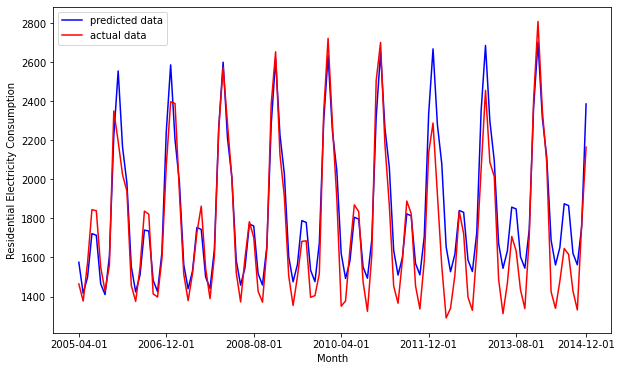

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(future_forecast[:], label = "predicted data",c = "b")
plt.plot(test[:],label = "actual data",c="r")
plt.xlabel("Month")
plt.ylabel("Residential Electricity Consumption")
plt.xticks([0,20,40,60,80,100,116])
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
test_results = {}
test_results['mse'] = mean_squared_error(test, pred)
mse = test_results['mse']
test_results['rmse'] = np.sqrt(mse)
test_results['mae'] = mean_absolute_error(test,pred)
test_results['mape'] = mape(test,pred)
test_results

{'mae': 119.45883525248095,
 'mape': 7.190769226738154,
 'mse': 22742.793996360655,
 'rmse': 150.80714172863517}

In [ ]:
Results = pd.DataFrame.from_dict(test_results, orient='index', columns=['Error'])
Results.T

,mse,rmse,mae,mape
Error,22742.793996,150.807142,119.458835,7.190769
